# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.



## Open the data file and have a look at the general information. 


In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

[Now let's explore our data. You'll want to see how many columns and rows it has, look at a few rows to check for potential issues with the data.]

In [3]:
# Let's see how many rows and columns our dataset has

df.shape

(21525, 12)

In [4]:
# let's print the first N rows

print(df.head())

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose  
0    purchase of the house 

In [5]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


[Are there missing values across all columns or just a few? Briefly describe what you see in 1-2 sentences.]

Days Employed & Total Income are missing data. They both have 19351 values when they should be 21525.



In [6]:
# Let's look at the filtered table with missing values in the the first column with missing data
miss_data = df['days_employed'].value_counts(dropna=False)
# miss_data=df.isna().sum()
print(df)

print(df[df['days_employed'].isnull() &  df['total_income'].isnull()].shape)



       children  days_employed  dob_years            education  education_id  \
0             1   -8437.673028         42    bachelor's degree             0   
1             1   -4024.803754         36  secondary education             1   
2             0   -5623.422610         33  Secondary Education             1   
3             3   -4124.747207         32  secondary education             1   
4             0  340266.072047         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1   -4529.316663         43  secondary education             1   
21521         0  343937.404131         67  secondary education             1   
21522         1   -2113.346888         38  secondary education             1   
21523         3   -3112.481705         38  secondary education             1   
21524         2   -1984.507589         40  secondary education             1   

           family_status  family_status

In [7]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table


miss_data= df[df['days_employed'].isna() & df['total_income'].isna()][['total_income', 'days_employed']].shape
                 
print(miss_data)



(2174, 2)


In [8]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values
df_nan = df[df['days_employed'].isna()]
print(df_nan)

       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

In [9]:
# Checking distribution

print(df_nan['income_type'].value_counts(normalize = True))

print(df['income_type'].value_counts(normalize = True))


employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64
employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64


In [10]:
# Checking the distribution in the whole dataset

print(df['purpose'].value_counts(normalize = True))

print(df['days_employed'].value_counts(normalize = True))



wedding ceremony                            0.037027
having a wedding                            0.036098
to have a wedding                           0.035958
real estate transactions                    0.031405
buy commercial real estate                  0.030848
housing transactions                        0.030337
buying property for renting out             0.030337
transactions with commercial real estate    0.030244
housing                                     0.030058
purchase of the house                       0.030058
purchase of the house for my family         0.029779
construction of own property                0.029501
property                                    0.029454
transactions with my real estate            0.029268
building a real estate                      0.029082
buy real estate                             0.028990
building a property                         0.028804
purchase of my own house                    0.028804
housing renovation                          0.

In [12]:
# Checking for other patterns - explain which

**Conclusions**


Days Employed and Total Income are missing the same numbr of values. I used info to see how many values populate in the columns

I will use mean,median, and mode for missing numerical values. I will drop values that are minute and wont affect the whole dataset if removed.

I will first remove duplicate values within columns. Then I will change puncuation so that all the values in the columns are the same. Then I will remove missing values if they affect the dataset.

## Data transformation



In [13]:
# Let's see all values in education column to check if and what spellings will need to be fixed
print(df.education)

0          bachelor's degree
1        secondary education
2        Secondary Education
3        secondary education
4        secondary education
                ...         
21520    secondary education
21521    secondary education
21522    secondary education
21523    secondary education
21524    secondary education
Name: education, Length: 21525, dtype: object


In [14]:
# Fix the registers if required
df['education'] = df['education'].str.lower()



In [15]:
# Checking all the values in the column to make sure we fixed them

print(df.education)


0          bachelor's degree
1        secondary education
2        secondary education
3        secondary education
4        secondary education
                ...         
21520    secondary education
21521    secondary education
21522    secondary education
21523    secondary education
21524    secondary education
Name: education, Length: 21525, dtype: object


[Check the data the `children` column]

In [16]:
# Let's see the distribution of values in the `children` column

print(df['children'].value_counts(normalize = True))



 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64


In [17]:
# [fix the data based on your decision]
df.drop(df[df['children'] == 20].index, inplace= True)
df.drop(df[df['children'] == -1].index, inplace= True)




In [18]:
# Checking the `children` column again to make sure it's all fixed
print(df['children'].value_counts(normalize = True))


0    0.661106
1    0.225119
2    0.096019
3    0.015419
4    0.001916
5    0.000421
Name: children, dtype: float64


In [19]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
# Let's see the distribution of values in the `children` column

print(df['days_employed'].value_counts(normalize = True))

-327.685916     0.000052
-1580.622577    0.000052
-4122.460569    0.000052
-2828.237691    0.000052
-2636.090517    0.000052
                  ...   
-201.643573     0.000052
-7120.517564    0.000052
-2146.884040    0.000052
-881.454684     0.000052
-3382.113891    0.000052
Name: days_employed, Length: 19240, dtype: float64


In [20]:
# Address the problematic values, if they exist

df['days_employed'] = df['days_employed'].abs()


In [21]:
# Check the result - make sure it's fixed
print(df.days_employed)

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21402, dtype: float64


[Let's now look at the client's age and whether there are any issues there. Again, think about what can data can be strange in this column, i.e. what cannot be someone's age.]

0 can't be someones age,

In [22]:
# Check the `dob_years` for suspicious values and count the percentage

print(df['dob_years'].value_counts(normalize = True))

35    0.028689
40    0.028175
41    0.028175
34    0.027895
38    0.027801
42    0.027661
33    0.026960
39    0.026726
31    0.025979
36    0.025839
29    0.025371
44    0.025371
48    0.025044
30    0.025044
37    0.024811
43    0.023830
50    0.023783
32    0.023643
49    0.023596
28    0.023409
45    0.023082
27    0.022895
52    0.022568
56    0.022521
47    0.022428
54    0.022241
46    0.021914
58    0.021540
53    0.021353
57    0.021353
51    0.020839
59    0.020606
55    0.020606
26    0.018970
60    0.017568
25    0.016634
61    0.016494
62    0.016400
63    0.012522
24    0.012289
64    0.012289
23    0.011775
65    0.009065
66    0.008551
22    0.008551
67    0.007803
21    0.005140
0     0.004672
68    0.004626
69    0.003878
70    0.003037
71    0.002710
20    0.002383
72    0.001542
19    0.000654
73    0.000374
74    0.000280
75    0.000047
Name: dob_years, dtype: float64


In [23]:
# Address the issues in the `dob_years` column, if they exist
df.drop(df[df['dob_years'] == 0].index, inplace= True)


In [24]:
# Check the result - make sure it's fixed
print(df['dob_years'].value_counts(normalize = True))

35    0.028824
41    0.028307
40    0.028307
34    0.028026
38    0.027932
42    0.027791
33    0.027087
39    0.026852
31    0.026101
36    0.025960
44    0.025491
29    0.025491
48    0.025162
30    0.025162
37    0.024927
43    0.023941
50    0.023894
32    0.023754
49    0.023707
28    0.023519
45    0.023190
27    0.023003
52    0.022674
56    0.022627
47    0.022533
54    0.022345
46    0.022017
58    0.021641
57    0.021453
53    0.021453
51    0.020937
55    0.020702
59    0.020702
26    0.019059
60    0.017651
25    0.016712
61    0.016571
62    0.016477
63    0.012581
64    0.012346
24    0.012346
23    0.011830
65    0.009107
22    0.008591
66    0.008591
67    0.007840
21    0.005164
68    0.004647
69    0.003896
70    0.003051
71    0.002723
20    0.002394
72    0.001549
19    0.000657
73    0.000376
74    0.000282
75    0.000047
Name: dob_years, dtype: float64


In [25]:
# Let's see the values for the column

print(df['family_status'].value_counts(normalize = True))

married              0.575251
civil partnership    0.194301
unmarried            0.130645
divorced             0.055347
widow / widower      0.044456
Name: family_status, dtype: float64


In [26]:
# Address the problematic values in `family_status`, if they exist

# No problems in this data set

In [27]:
# Check the result - make sure it's fixed
print(df['family_status'].value_counts(normalize = True))

married              0.575251
civil partnership    0.194301
unmarried            0.130645
divorced             0.055347
widow / widower      0.044456
Name: family_status, dtype: float64


In [28]:
# Let's see the values in the column
print(df['gender'].value_counts(normalize = True))


F      0.661112
M      0.338841
XNA    0.000047
Name: gender, dtype: float64


In [29]:
# Address the problematic values, if they exist

df.drop(df[df['gender'] == 'XNA'].index, inplace= True)


In [30]:
# Check the result - make sure it's fixed
print(df['gender'].value_counts(normalize = True))


F    0.661143
M    0.338857
Name: gender, dtype: float64


In [31]:
# Let's see the values in the column
print(df['income_type'].value_counts(normalize = True))

employee                       0.516220
business                       0.236280
retiree                        0.179287
civil servant                  0.067931
unemployed                     0.000094
entrepreneur                   0.000094
student                        0.000047
paternity / maternity leave    0.000047
Name: income_type, dtype: float64


In [32]:
# Address the problematic values, if they exist
# No Problems

In [33]:
# Check the result - make sure it's fixed

print(df['income_type'].value_counts(normalize = True))

employee                       0.516220
business                       0.236280
retiree                        0.179287
civil servant                  0.067931
unemployed                     0.000094
entrepreneur                   0.000094
student                        0.000047
paternity / maternity leave    0.000047
Name: income_type, dtype: float64


In [34]:
# Checking duplicates
#df.duplicated(subset=None, keep='first')

df.duplicated().sum()



71

In [35]:
# Address the duplicates, if they exist
df.drop_duplicates(keep = 'first', inplace = True)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [36]:
# Last check whether we have any duplicates
df.duplicated().sum()


0

In [37]:
# Check the size of the dataset that you now have after your first manipulations with it
df.size

254760

[Describe your new dataset: briefly say what's changed and what's the percentage of the changes, if there were any.]

The total amount of the dataset dropped by 71. 

A % change of .0002757838

The dataset now has no duplicates.

# Working with missing values

In [38]:
# Find the dictionaries
print(df[['education_id', 'family_status_id', 'education' ,'family_status']])

education_dict = {0: 'bachelor\'s degree', 1: 'secondary education', 2: 'some college', 3: 'primary_education', 4: 'graduate degree'}

family_dict = {0: 'married', 1: 'civil partnership', 2: 'widow/widower', 3: 'divorced', 4: 'unmarried'}

print(education_dict)

print(family_dict)

       education_id  family_status_id            education      family_status
0                 0                 0    bachelor's degree            married
1                 1                 0  secondary education            married
2                 1                 0  secondary education            married
3                 1                 0  secondary education            married
4                 1                 1  secondary education  civil partnership
...             ...               ...                  ...                ...
21520             1                 1  secondary education  civil partnership
21521             1                 0  secondary education            married
21522             1                 1  secondary education  civil partnership
21523             1                 0  secondary education            married
21524             1                 0  secondary education            married

[21230 rows x 4 columns]
{0: "bachelor's degree", 1: 'secondary

In [39]:
df.family_status.unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [40]:
df.family_status_id.unique()

array([0, 1, 2, 3, 4])

In [41]:
d = df.groupby('education')['education_id'].apply(list).to_dict()
f = df.groupby('family_status')['family_status_id'].apply(list).to_dict()

### Restoring missing values in `total_income`

In [42]:
# Let's write a function that calculates the age category

def dob_years(age):
     if age <= 29:
        return 'youth'
     if age <= 39:
        return 'adult'
     if age <= 59:
        return 'middle aged'
     if age >= 60:
        return 'senior'

In [43]:
# Test if the function works
print(dob_years(24))
print(dob_years(35))
print(dob_years(50))
print(dob_years(74))

youth
adult
middle aged
senior


In [44]:
# Creating new column based on function

df['age_group'] = df['dob_years'].apply(dob_years)

In [45]:
# Checking how values in the new column
print(df['age_group'])


0        middle aged
1              adult
2              adult
3              adult
4        middle aged
            ...     
21520    middle aged
21521         senior
21522          adult
21523          adult
21524    middle aged
Name: age_group, Length: 21230, dtype: object


In [46]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     19149 non-null  float64
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      19149 non-null  float64
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB
None


In [47]:
# Look at the mean values for income based on your identified factors
mean_income = df['total_income'].mean()
print(mean_income)

26798.699010026634


In [48]:
# Look at the median values for income based on your identified factors
#median_income = df['total_income'].median()
#print(median_income)


#median_by_type = df[['total_income','income_type']]
#print(median_by_type.groupby('income_type').median().sort_values('total_income',ascending=False).head(10)) 

In [49]:
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     19149 non-null  float64
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      21230 non-null  float64
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [51]:
#  Write a function that we will use for filling in missing values
        
df['total_income'].fillna(df['total_income'].median(), inplace=True) 

In [52]:
# Check if it works
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     19149 non-null  float64
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      21230 non-null  float64
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB
None


In [54]:
# Check if we got any errors
df['total_income'].head()

0    40620.102
1    17932.802
2    23341.752
3    42820.568
4    25378.572
Name: total_income, dtype: float64

In [56]:
# Checking the number of entries in the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     19149 non-null  float64
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      21230 non-null  float64
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


###  Restoring values in `days_employed`

In [57]:
# Distribution of `days_employed` medians based on your identified parameters

mean_daysemployed = df['days_employed'].mean()
print(mean_daysemployed)


67015.85571538519


In [58]:
# Distribution of `days_employed` means based on your identified parameters
median_daysemployed = df['days_employed'].median()
print(median_daysemployed)

2197.460718185312


In [59]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
median_daysemployed = df['days_employed'].median()
print(median_daysemployed)

2197.460718185312


In [60]:
# Check that the function works

median_daysemployed = df['days_employed'].median()
print(median_daysemployed)

2197.460718185312


In [61]:
df['days_employed'].max()

401755.40047533

In [62]:
#df.drop(df[df['days_employed'] >= 300000].index, inplace = True)
#median = df.loc[df['days_employed']>21000, 'days_employed'].median()
#df.loc[df.days_employed > 21000, 'days_employed'] = np.nan
#df.fillna(median,inplace=True)

In [63]:
days_employed_threshold = 50*365.25
extreme_days_employed_idx = df['days_employed'] > days_employed_threshold
df.loc[extreme_days_employed_idx , 'days_employed'] = df.loc[~extreme_days_employed_idx , 'days_employed'].median()

array([[<AxesSubplot:title={'center':'days_employed'}>]], dtype=object)

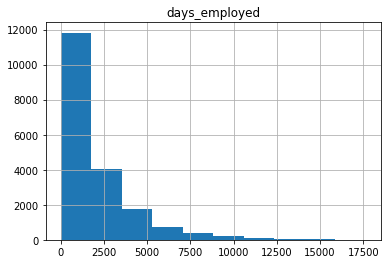

In [64]:
df.hist('days_employed')

In [65]:
# Apply function to the income_type

# median/mean days_employed by say income_type and age_group

#table = df.pivot_table(index = ['income_type'], values='income_type', aggfunc=['mode'])



df['income_type']=df['income_type'].fillna(df['income_type'].fillna('unknown'))

df['days_employed']=df['days_employed'].fillna(df['days_employed'].median())






In [66]:
# Check if function worked
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     21230 non-null  float64
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      21230 non-null  float64
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [67]:
# Replacing missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     21230 non-null  float64
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      21230 non-null  float64
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


[When you think you've finished with `total_income`, check that the total number of values in this column matches the number of values in other ones.]

In [68]:
# Check the entries in all columns - make sure we fixed all missing values

df['days_employed'].convert_dtypes('days_employed') 

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21230 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     21230 non-null  float64
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      21230 non-null  float64
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB
None


In [69]:
df['days_employed'] = df['days_employed'].astype(int)

print(df.dtypes)


children              int64
days_employed         int64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
age_group            object
dtype: object


# Categorization of data




In [70]:
# Print the values for your selected data for categorization
df['total_income'].value_counts().head(15)
df['children'].value_counts().head()
df['family_status'].value_counts().head()
df['purpose'].value_counts().head(15)


wedding ceremony                            785
having a wedding                            759
to have a wedding                           755
real estate transactions                    669
buy commercial real estate                  655
buying property for renting out             647
transactions with commercial real estate    643
housing transactions                        641
purchase of the house for my family         636
housing                                     635
purchase of the house                       634
property                                    627
construction of own property                626
transactions with my real estate            623
building a property                         619
Name: purpose, dtype: int64

[Let's check unique values]

In [71]:
# Check the unique values
len(df['total_income'].unique())
len(df['children'].unique())
len(df['family_status'].unique())
len(df['purpose'].unique())


38

In [72]:
# Let's write a function to categorize the data based on common topics
text_log = df[['family_status','purpose']]

print(text_log)

           family_status                  purpose
0                married    purchase of the house
1                married             car purchase
2                married    purchase of the house
3                married  supplementary education
4      civil partnership        to have a wedding
...                  ...                      ...
21520  civil partnership     housing transactions
21521            married        purchase of a car
21522  civil partnership                 property
21523            married        buying my own car
21524            married             to buy a car

[21230 rows x 2 columns]


In [74]:
# Looking through all the numerical data in your selected column for categorization
number_log = df[['children','total_income']]
print(number_log)

       children  total_income
0             1     40620.102
1             1     17932.802
2             0     23341.752
3             3     42820.568
4             0     25378.572
...         ...           ...
21520         1     35966.698
21521         0     24959.969
21522         1     14347.610
21523         3     39054.888
21524         2     13127.587

[21230 rows x 2 columns]


In [75]:
# Getting summary statistics for the column

# Average income by # of children


df[["children", "total_income"]].groupby("children").mean()




,total_income
children,
0,26096.112986
1,27078.823259
2,27151.458416
3,28769.787213
4,26618.121146
5,26773.986833


[Decide what ranges you will use for grouping and explain why.]

In [76]:
# Creating function for categorizing into different numerical groups based on ranges

df.groupby("children").mean()

df['total_income'].value_counts(bins=5)


(2947.571, 75144.739]       20943
(75144.739, 146982.715]       258
(146982.715, 218820.692]       21
(218820.692, 290658.668]        6
(290658.668, 362496.645]        2
Name: total_income, dtype: int64

In [77]:
print(df['purpose'].value_counts())
purpose_log = df[['education_id', 'family_status_id']]
purpose_ref = df[['purpose','education_id']]
purpose_ref = purpose_ref.drop_duplicates().reset_index(drop=True)
print(purpose_ref.sort_values('education_id')) 

wedding ceremony                            785
having a wedding                            759
to have a wedding                           755
real estate transactions                    669
buy commercial real estate                  655
buying property for renting out             647
transactions with commercial real estate    643
housing transactions                        641
purchase of the house for my family         636
housing                                     635
purchase of the house                       634
property                                    627
construction of own property                626
transactions with my real estate            623
building a property                         619
purchase of my own house                    618
building a real estate                      617
buy real estate                             612
housing renovation                          602
buy residential real estate                 599
buying my own car                       

In [78]:
print(df['income_type'].value_counts())
income_log = df[['education_id', 'family_status_id']]
income_ref = df[['income_type','family_status_id']]
income_ref = income_ref.drop_duplicates().reset_index(drop=True)
print(income_ref.sort_values('family_status_id')) 

employee                       10961
business                        5026
retiree                         3792
civil servant                   1445
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64
                    income_type  family_status_id
0                      employee                 0
21                 entrepreneur                 0
20                   unemployed                 0
9                 civil servant                 0
8                       retiree                 0
25  paternity / maternity leave                 0
3                      business                 0
23                   unemployed                 1
4                      employee                 1
1                       retiree                 1
2                      business                 1
24                 entrepreneur                 1
13                civi

In [79]:
#create a function to label income lvl

def income_assignment(total_income):
    if total_income <= 17000:
        return 'small'
    elif total_income <= 50000:
        return 'medium'
    else:
        return 'large'
        

In [80]:
df['income_label'] = df['total_income'].apply(income_assignment)

In [81]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_label
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,middle aged,medium
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult,medium
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult,medium
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult,medium
4,0,1631,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,middle aged,medium


## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**
There is no correlation between having children and paying back on time. If a person had 5 children , according to their dataset the default rate would be 0. However there are only 9 persons in the dataset that have 5 children so we don't know how many more persons with 5 children could impace the dataset. The majority of of persons had 0 or 1 children and they had a low likelyhood to defaulting on loans.

In [82]:
# Check the children data and paying back on time

df[["children", "debt", "purpose"]].groupby("children")['debt'].mean().sort_values(ascending= False)

# Calculating default-rate based on the number of children


# closer to 1.0, greater likely-hood to defaulting



children
4    0.097561
2    0.095145
1    0.092028
3    0.082317
0    0.075458
5    0.000000
Name: debt, dtype: float64

In [83]:
df.groupby('children').size()

children
0    14021
1     4792
2     2039
3      328
4       41
5        9
dtype: int64

**Is there a correlation between family status and paying back on time?**

There seems to be a correlation betwwen family status and paying pack on team. Persons that are married, involved in a civil partnership and unmarried seem to have no trouble paying back loans and are the majority of the dataset. Divorcees and widow/er's seem to have a lower default rate than the top three but it could be related to the lower number in their specific datasets compared to the other family status's.

In [84]:
# Check the family status data and paying back on time

df[["family_status", "debt", "purpose"]].groupby("family_status")['debt'].mean().sort_values(ascending= False)


# Calculating default-rate based on family status

family_status
unmarried            0.097842
civil partnership    0.093142
married              0.075575
divorced             0.071247
widow / widower      0.065539
Name: debt, dtype: float64

In [85]:
df.groupby('family_status').size().sort_values(ascending= False)

family_status
married              12213
civil partnership     4112
unmarried             2780
divorced              1179
widow / widower        946
dtype: int64

**Is there a correlation between income level and paying back on time?**
There is a small correlation between income level and paying loans back on time. Persons with incomes less than 17k default 9% of the time, 50k and under 8% and 50k+ 7% of the time. The majority of the dataset falls within the medium category and only 8% of them default on their loans. So their is very low correlation dependent on income level.

In [86]:
# Check the income level data and paying back on time

df[["total_income", "debt","income_label"]].groupby("income_label")['debt'].mean().sort_values(ascending= False)


# Calculating default-rate based on income level



income_label
medium    0.082989
small     0.078978
large     0.069962
Name: debt, dtype: float64

In [87]:
df.groupby('income_label').size().sort_values(ascending= False)

income_label
medium    14749
small      5166
large      1315
dtype: int64

**How does credit purpose affect the default rate?**

In [88]:
df.loc[df['purpose'].str.contains('house'), 'purpose_list'] = 'real estate'
df.loc[df['purpose'].str.contains('car'), 'purpose_list'] = 'car'
df.loc[df['purpose'].str.contains('edu'), 'purpose_list'] = 'education'
df.loc[df['purpose'].str.contains('marriage'), 'purpose_list'] = 'marriage'

In [89]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_label,purpose_list
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,middle aged,medium,real estate
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult,medium,car
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult,medium,real estate
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult,medium,education
4,0,1631,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,middle aged,medium,NaN
5,0,926,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,youth,medium,real estate
6,0,2879,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,middle aged,medium,NaN
7,0,152,50,secondary education,1,married,0,M,employee,0,21731.829,education,middle aged,medium,education
8,2,6929,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult,small,NaN
9,0,2188,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,middle aged,medium,real estate


In [90]:
purpose_dict = {
    "real estate transactions":
        'real estate',
    "transactions with my real estate":
        'real estate',
    "transactions with commercial real estate":
        'real estate',
    "buy real estate":
        'real estate',
    "purchase of the house":
        'real estate',
    "purchase of the house for my family":
        'real estate',
    "purchase of my own house":
        'real estate',
    "property":
        'real estate',
    "housing transactions":
        'real estate',
    "housing renovation":
        'real estate',
    "housing":
        'real estate',
    "construction of own property":
        'real estate',
    "buying property for renting out":
        'real estate',
    "buy residential real estate":
        'real estate',
    "buy real estate":
        'real estate',
    "buy commercial real estate":
        'real estate',
    "building a real estate":
        'real estate',
    "building a property":
        'real estate',
    "to own a car":
        'car transaction',
    "to buy a car":
        'car transaction',
    "second-hand car purchase":
        'car transaction',
    "purchase of a car":
        'car transaction',
    "cars":
        'car transaction',
    "car purchase":
        'car transaction',
    "car":
        'car transaction',
    "buying my own car":
        'car transaction',
    "buying a second-hand car":
        'car transaction',
    "university education":
        'education',
    "to get a supplementary education":
        'education',
    "supplementary education":
        'education',
    "profile education":
        'education',
    "education":
        'education',
   "getting an education":
        'education',
   "getting higher education":
        'education',
   "going to university":
        'education',
    "wedding ceremony":
        'marriage',
    "to have a wedding":
        'marriage',
    "having a wedding":
        'marriage',
    "to become educated":
        'education',
    "buy real estate":
        'real estate'
}        
    

In [91]:
def purpose_list(purpose):
    if ('car') in purpose:
        return 'Car Transaction'
    elif ('real') in purpose or ('housing') in purpose or ('house') in purpose:
        return 'Real Estate Transaction'
    elif ('education') in purpose or ('university') in purpose:
        return ' Educational Transaction'
    else:
        return 'Wedding Transaction'


In [92]:
df['purpose_grouped'] = df['purpose'].apply(purpose_list)

In [93]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_label,purpose_list,purpose_grouped
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,middle aged,medium,real estate,Real Estate Transaction
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult,medium,car,Car Transaction
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult,medium,real estate,Real Estate Transaction
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult,medium,education,Educational Transaction
4,0,1631,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,middle aged,medium,NaN,Wedding Transaction
5,0,926,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,youth,medium,real estate,Real Estate Transaction
6,0,2879,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,middle aged,medium,NaN,Real Estate Transaction
7,0,152,50,secondary education,1,married,0,M,employee,0,21731.829,education,middle aged,medium,education,Educational Transaction
8,2,6929,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult,small,NaN,Wedding Transaction
9,0,2188,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,middle aged,medium,real estate,Real Estate Transaction


In [94]:
print(purpose_dict)

{'real estate transactions': 'real estate', 'transactions with my real estate': 'real estate', 'transactions with commercial real estate': 'real estate', 'buy real estate': 'real estate', 'purchase of the house': 'real estate', 'purchase of the house for my family': 'real estate', 'purchase of my own house': 'real estate', 'property': 'real estate', 'housing transactions': 'real estate', 'housing renovation': 'real estate', 'housing': 'real estate', 'construction of own property': 'real estate', 'buying property for renting out': 'real estate', 'buy residential real estate': 'real estate', 'buy commercial real estate': 'real estate', 'building a real estate': 'real estate', 'building a property': 'real estate', 'to own a car': 'car transaction', 'to buy a car': 'car transaction', 'second-hand car purchase': 'car transaction', 'purchase of a car': 'car transaction', 'cars': 'car transaction', 'car purchase': 'car transaction', 'car': 'car transaction', 'buying my own car': 'car transact

In [95]:
df['purpose_category'] = df['purpose'].replace(purpose_dict)


In [96]:
df['purpose_category'].unique()

array(['real estate', 'car transaction', 'education', 'marriage'],
      dtype=object)

In [97]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_label,purpose_list,purpose_grouped,purpose_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,middle aged,medium,real estate,Real Estate Transaction,real estate
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult,medium,car,Car Transaction,car transaction
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult,medium,real estate,Real Estate Transaction,real estate
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult,medium,education,Educational Transaction,education
4,0,1631,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,middle aged,medium,NaN,Wedding Transaction,marriage


In [98]:
# Check the percentages for default rate for each credit purpose and analyze them

df[["purpose_category", "debt"]].groupby("purpose_category")['debt'].mean().sort_values(ascending= False)



purpose_category
car transaction    0.093236
education          0.092947
marriage           0.078730
real estate        0.072596
Name: debt, dtype: float64

In [99]:
df.groupby('purpose_category').size().sort_values(ascending= False)

purpose_category
real estate        10703
car transaction     4258
education           3970
marriage            2299
dtype: int64

**Conclusion**

I combined all of the purposes into groups that fit them. I then checked the default rate for those specific groups rather than multiple indivual purposes. It looks like people who are involved in transactions related to Real Estate have the lowest defualt rate but also the most people in the dataset. It would be a reasonable statement to say those involved with Real Estate would be pretty reliable to give a loan to. The ROI on Car and Education related expenses is not a beneficial as real estate. Those who are involved in Car and Edcuation related expenses have an almost 3% higher default rate than those who own real estate.

# General Conclusion 



I opened the data filestudied the general information of the set.

I identified and filled in missing values. I filled in missing values in the total income column, Missing values were most likely present due to human error. I used the fillna function with median. I removed outliers so the median would be more accurate of the general dataset.

Then I replaced the real number data type with the integer type, deleted duplicate data(I used the drop duplicate method to, we wanted to drop duplicatest to see if it would affect the data set, the removal of them didnt affect the dataset) and proceeded to categorize the data.(I used the astype to change the data type. I did this becuase some of the incomes had 5 numbers behind the decimal so to clean up the column)

 I used education and family status id as the dictionaries. I used them becuase I could map them to columns that are directly related to them (family and education).

The data may contain artifacts, or values that don't correspond to reality (for instance, a negative number of days employed). This kind of thing happens when you're working with real data. You need to describe the possible reasons such data may have turned up and process it.*

The total income had all negative values, I used a function to turn them all into positive. A reason such data might have been inside the data set would probably be due to human error.

Is there a connection between having kids and repaying a loan on time? According to the dataset, there is no connection between the number of kids and repaying a loan on time.
Is there a connection between marital status and repaying a loan on time? 
There doesnt seem to be a connection between marital status and repaying a loan on time. Married persons seem to default 7% of the time with the majority of the dataset at their disposal.
Is there a connection between income level and repaying a loan on time? There seems to be no direct connection between income level and reapaying a loan on time. The three categories that I created (Small, Medium, High) all fell into the 7-9% default rate.
How do different loan purposes affect on-time loan repayment? Peoples that own real estate seem to default less at a substantial rate as compared to 
